# Feature Engineering

In [9]:
# libraries
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for graphis, charts
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm
from mypipes import *

In [3]:
# import file

file_train = r'C:/Users/mrroo/Desktop/Work stuff/Kaggle/house-prices-advanced-regression-techniques/train.csv'
file_test = r'C:/Users/mrroo/Desktop/Work stuff/Kaggle/house-prices-advanced-regression-techniques/test.csv'

train_df = pd.read_csv(file_train)
test_df = pd.read_csv(file_test)

In [4]:
# view data

pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns

train_df.sample(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
137,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,7,5,1988,1989,Gable,CompShg,VinylSd,VinylSd,BrkFace,70.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1907,1907,GasA,Gd,Y,SBrkr,1959,0,0,1959,0,0,3,0,5,2,TA,9,Typ,0,NaN,2Types,1989.0,Unf,3,766,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Family,171000
921,922,90,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,Duplex,1.5Fin,5,7,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1084,Unf,0,188,1272,GasA,Gd,Y,SBrkr,1272,928,0,2200,2,0,2,2,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,70,0,0,0,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal,145900
834,835,20,RL,75.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,TA,TA,CBlock,TA,TA,No,Rec,572,Unf,0,572,1144,GasA,Gd,Y,SBrkr,1144,0,0,1144,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,2,456,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,9,2008,WD,Normal,139950
893,894,20,RL,NaN,13284,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,PosN,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,1064,Unf,0,319,1383,GasA,TA,Y,SBrkr,1383,0,0,1383,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1954.0,Unf,1,354,TA,TA,Y,511,116,0,0,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,165000
1174,1175,70,RL,80.0,16560,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,8,1932,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,Rec,503,Unf,0,449,952,GasA,TA,Y,SBrkr,1170,1175,0,2345,0,0,2,1,4,1,TA,9,Typ,1,Gd,Detchd,1932.0,Unf,2,360,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,239000
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1081,1082,20,RL,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,824,Unf,0,216,1040,GasA,Fa,Y,SBrkr,1040,0,0,1040,1,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1963.0,Fin,1,308,TA,TA,Y,0,0,220,0,0,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,133000
198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,6,6,1912,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,755,755,GasA,Ex,Y,SBrkr,929,929,371,2229,0,0,1,0,5,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,198,30,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
200,201,20,RM,80.0,8546,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1121,1121,GasA,Ex,Y,SBrkr,1121,0,0,1121,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,2003.0,RFn,2,440,TA,TA,Y,132,64,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,140000
274,275,20,RL,76.0,8314,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1982,1982,Gable,CompShg,HdBoard,ImStucc,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,546,Unf,0,270,816,Ga

In [7]:
# numerical features
numerical_features = train_df. select_dtypes(include=np.number)

# statistics
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


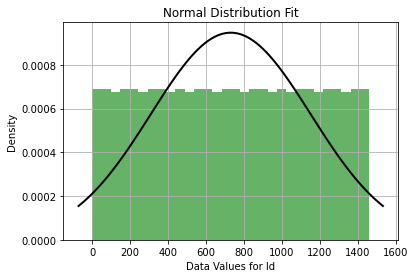

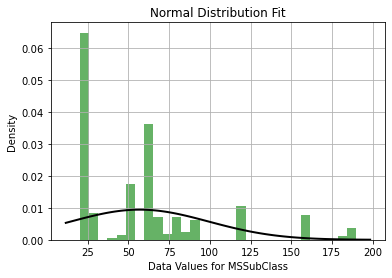

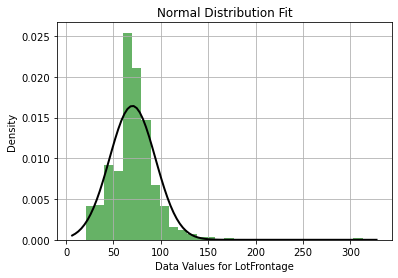

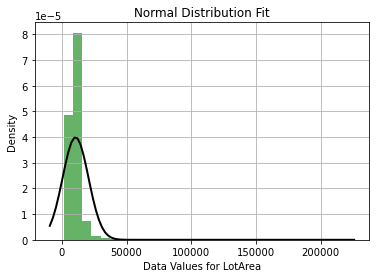

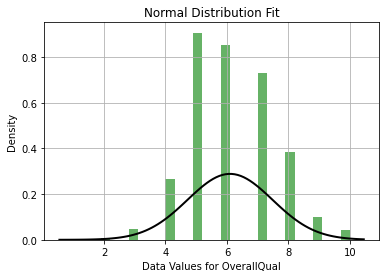

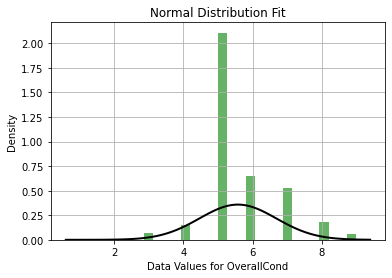

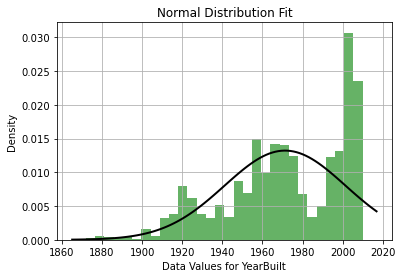

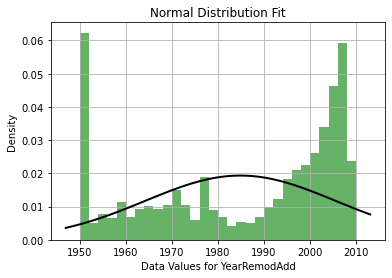

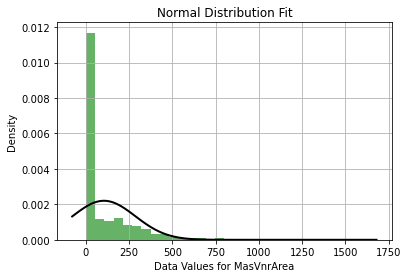

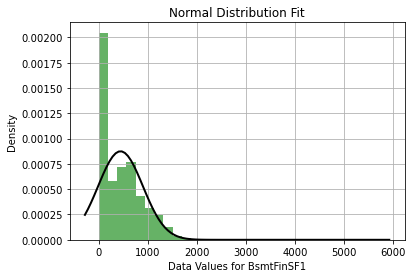

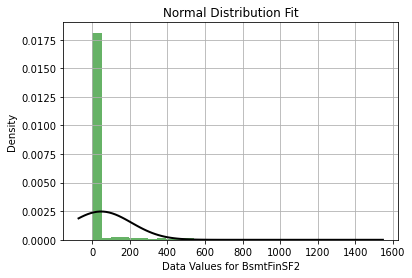

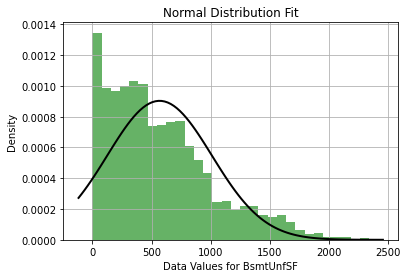

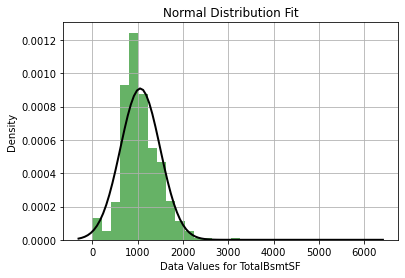

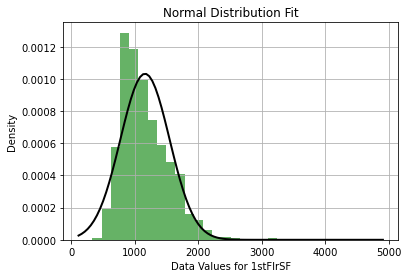

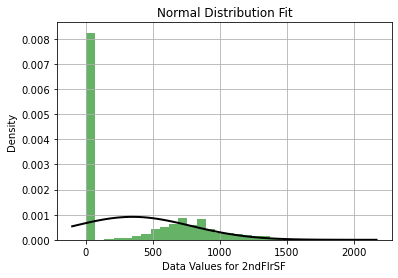

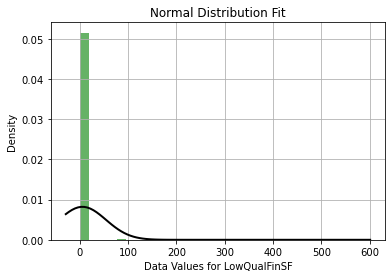

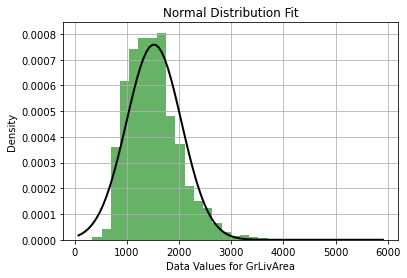

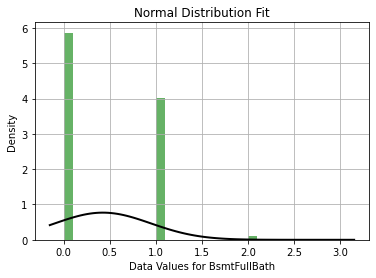

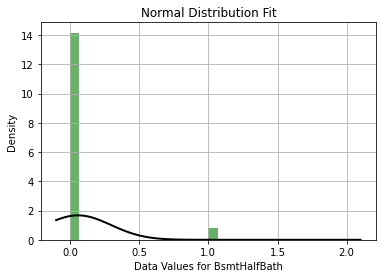

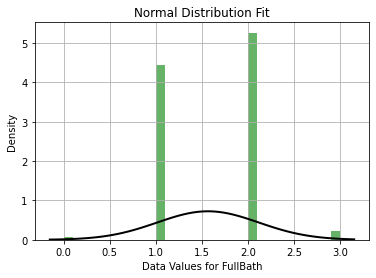

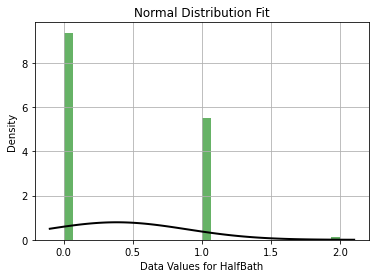

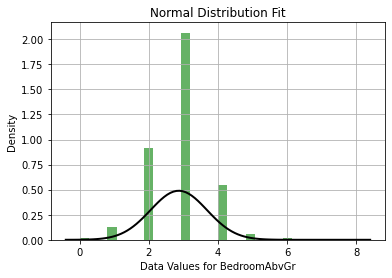

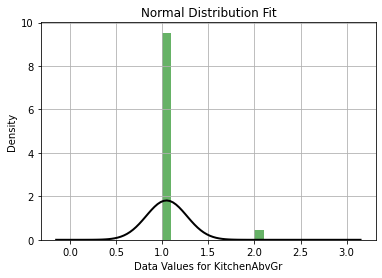

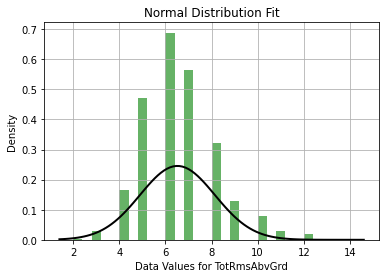

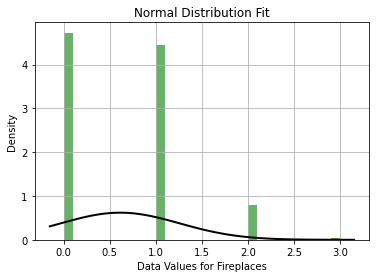

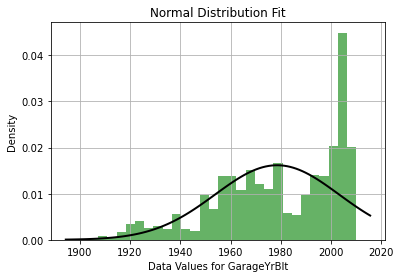

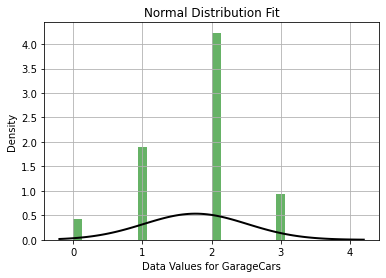

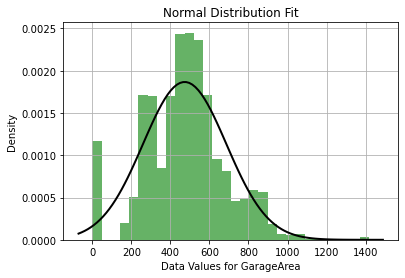

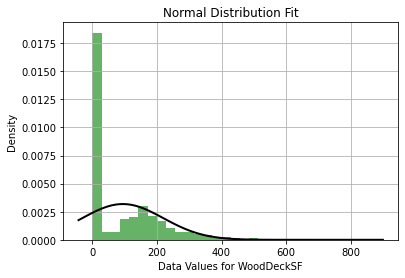

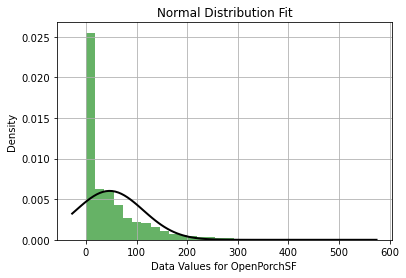

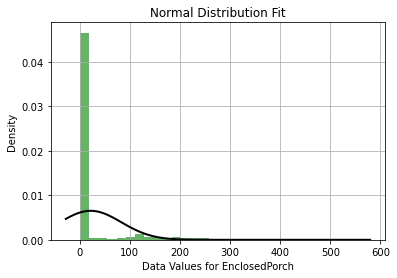

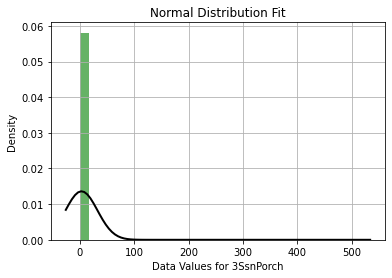

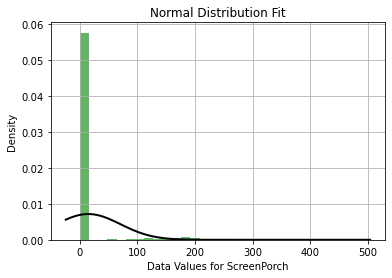

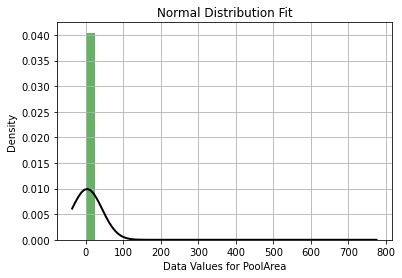

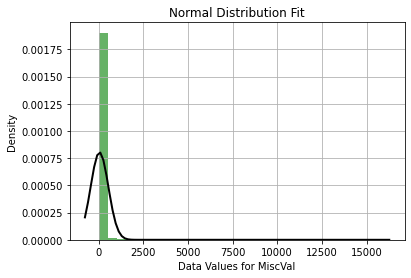

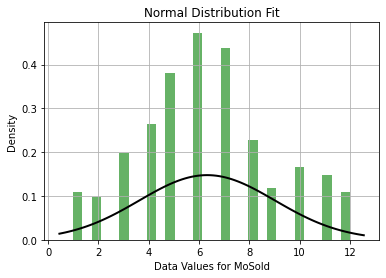

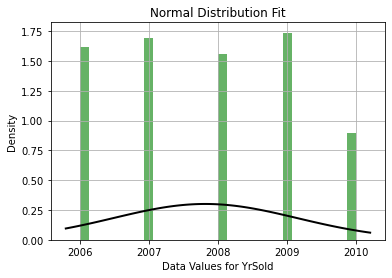

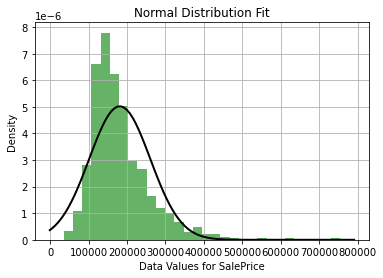

In [23]:
# create a graph depicting a normal distribution of all the numerical features

# create a function that plots the data for single column or feature
def createNormaldist(data, column):
    data_clean = data[~np.isnan(data)]
    mu,std = norm.fit(data_clean)
    # plot
    plt.hist(data_clean, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot the fitted normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Data Values for '+col)
    plt.ylabel('Density')
    plt.title('Normal Distribution Fit')
    plt.grid(True)
    plt.show()
    
# iterating the function overall the numerical features

for col in numerical_features.columns:
    createNormaldist(numerical_features[col], col)
    print("")

In [25]:
# categorical feature

categorical_features = train_df.select_dtypes(include = [object])

# summary stats
categorical_features.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Creating a Data Pipeline
Why do this? - So we have consistent infrastructure for transforming the test set

Goal - To create infrastructure that lets us make changes without breaking everything

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [36]:
# Update categorical and numerical columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = train_df.drop('SalePrice', axis=1)
y = np.log(train_df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

In [37]:
#pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

In [38]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)

In [39]:
# creating new data set using function transformer

new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = train_df.drop('SalePrice', axis=1)
y = np.log(train_df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

In [42]:
pd.DataFrame(data =X_preprocessed_fe).sample(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
960,-3.971963,-2.589270,0.457431,1.950614,-2.753881,-0.678013,-0.303924,1.025279,1.883831,0.897485,-0.119970,2.012447,0.711094,0.081189,1.277847,-1.371854,-0.624505,0.107892,-0.202558,0.148550,-0.259429,0.804555,0.292500,0.609445,0.223148,-0.419338,-0.793617,0.676429,-0.328449,-0.640066,0.853450,-0.358272,-0.214215,0.417936,-0.354617,0.047298,-0.195753,-0.075218,-0.561194,0.057349,-0.005133,-0.362430,0.251689,-0.058306,-0.591860,-0.419679,0.858092,0.639751,0.254790,-0.511458,0.528801,0.748642,0.376460,0.902007,-0.360591,0.054769,0.142108,-0.140508,-0.712514,-0.033941,0.232917,0.083348,-0.889689,-0.108642,0.211767,-0.041918,0.192416,-0.142015,0.150880,-0.751731,-0.281942,0.253034,0.029676,0.293704,0.168445,0.031005,0.287948,-0.181811,-0.046526,-0.247318
450,-4.577108,-0.254504,0.500815,-2.434376,0.639555,-0.375671,0.896867,2.950484,0.387537,-0.029038,-0.627331,0.455929,0.783170,0.022650,-0.693329,-0.886693,-0.133058,0.186000,0.350004,1.809795,-0.197942,0.661355,-0.496687,0.609131,0.349121,0.178861,0.172825,-0.546240,-0.334413,0.454366,-0.564434,-0.354811,1.203159,-0.158173,1.207229,-0.084831,0.462663,-0.183182,-0.365558,1.016461,0.844651,-0.043761,0.513969,0.239910,-0.344596,0.680553,0.330818,-0.163828,-0.185117,-0.252538,-0.426305,0.501247,-0.261707,-0.412096,-0.100175,0.171925,0.007095,-0.802445,-0.145337,-0.341575,0.239975,0.148090,0.590270,-0.204691,0.416923,0.183961,-0.104378,0.237772,0.515103,0.069390,0.348468,0.358938,-0.112388,0.381563,-0.377082,0.020149,-0.202414,-0.511858,0.513724,-0.532924
1069,-3.223988,-1.559469,0.015255,-0.776034,0.321484,-0.758602,0.956844,1.178929,-1.023470,0.993807,-2.791647,-1.080147,1.438258,-1.621042,0.236791,0.196933,0.015237,-0.522447,1.587338,-0.720339,1.005962,-0.152711,0.151456,-0.444330,0.880763,0.177032,-0.627302,-0.517120,-0.347887,0.280543,1.049425,0.343226,-0.261149,-0.239915,-0.488496,0.812973,0.421253,-0.549975,-0.161241,-0.490614,0.641486,-0.594555,0.000176,-0.060401,-0.174654,-0.828466,0.507254,-0.017454,-0.127007,-0.499467,-0.278717,-0.481680,0.192428,-0.462483,0.293486,-0.594737,0.114430,-0.078476,0.096763,0.293413,0.370985,0.528375,0.502382,-0.509668,-0.264338,0.118148,-0.327137,0.093671,-0.257571,0.038712,-0.267015,-0.122265,-0.092666,-0.173418,0.073728,-0.041546,-0.288734,-0.018062,0.058821,0.027628
643,-0.313676,1.547285,-0.668677,1.264640,-0.140101,-1.147359,1.895636,-2.582039,-0.111536,0.113138,-0.556569,-0.499855,-0.529554,-0.932870,-0.299063,-0.360969,0.708631,0.710659,-1.323192,0.361075,-0.082868,0.530181,0.482909,0.517642,-0.343499,0.469973,0.749463,0.353226,-0.224615,1.012762,0.262718,0.351454,-0.112491,-0.188034,0.155935,-0.743341,0.794243,-0.022593,-0.231173,0.148508,-0.344629,0.563104,-0.442383,-0.122086,-0.233142,0.393878,-0.298571,-1.119639,-0.189038,0.212844,-0.227067,0.603002,0.471191,-0.181013,-0.316091,0.479088,-0.906987,0.030964,0.172327,0.328197,-0.141556,-0.363399,0.025044,0.048315,-0.248731,-0.021772,-0.032743,0.017887,-0.531859,0.322268,0.088949,-0.582581,-0.038028,0.301959,0.126491,0.210209,0.159525,0.031732,-0.149232,-0.410025
331,-2.608914,-1.387628,1.488464,0.164413,1.270888,-0.486484,-0.118464,-0.194027,1.229503,-0.641526,-0.411644,0.996010,0.322739,-0.126714,-0.541717,-0.721710,0.110725,0.229861,0.038682,0.133315,-0.982827,0.104058,-0.064331,-0.795081,0.538896,0.459288,0.239996,-0.419626,0.181815,0.549258,0.026138,0.652425,0.447052,0.229570,-0.243492,-1.055643,0.319937,-0.189824,-0.286476,0.063679,-0.630593,-0.918425,-0.108036,0.208842,-0.394793,0.455666,0.639150,0.631670,-0.091002,-0.150555,-0.313817,-0.008081,0.145075,0.503436,-0.035936,-0.273638,0.007006,0.032670,0.409350,0.037964,0.304450,-0.039333,-0.100506,0.245225,0.110532,0.359489,-0.016151,-0.258789,-0.049054,0.328042,-0.052642,-0.405190,0.302275,0.022144,-0.1

# Fit and Parameter Tune models
We explore some different types of models here and see how they work (or don't work) Want more details on Parameter Tuning? Check out this notebook: https://www.kaggle.com/code/kenjee/model-building-example-section-11 Want more details on Regression Models? Check out this notebook: https://www.kaggle.com/code/kenjee/model-evaluation-regression-12

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Training and tuning LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16330063501041597

Training and tuning RandomForest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.1486749204200693

Training and tuning XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13771374236030393



In [47]:
X_train_scaled_fe = X_train.copy()
X_test_scaled_fe = X_test.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


C:\Users\mrroo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.08117242e+00             nan -2.08117242e+00             nan
 -2.08117242e+00             nan -5.95733242e-01 -3.84594530e+01
 -5.95733242e-01 -1.31985373e+04 -5.95733242e-01 -8.02049768e-01
 -1.30274054e-01 -1.82434278e+01 -1.30274054e-01 -2.23705255e+04
 -1.30274054e-01 -1.39181721e+00 -1.34868371e+00             nan
 -1.34868371e+00             nan -1.34868371e+00             nan
 -1.68970381e-01 -3.81704748e+01 -1.68970381e-01 -1.30785923e+04
 -1.68970381e-01 -8.01674985e-01 -4.19114621e-02 -1.78865665e+01
 -4.19114621e-02 -2.22579810e+04 -4.19114621e-02 -1.37681862e+00
 -8.50344962e-01             nan -8.50344962e-01             nan
 -8.50344962e-01             nan -1.16823689e-01 -3.76522309e+01
 -1.16823689e-01 -1.29982392e+04 -1.16823689e-01 -9.09875214e-01
 -2.98634612e-02 -1.78202139e+01 -2.98634612e-02 -2.21474685e+04
 -2.98634612

Best parameters found:  {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}
Test score:  0.1319368924474993


In [51]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))
    
print( 'MLP: '+str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

LinearRegression: 0.1415904581366459
RandomForest: 0.14419727956768674
XGBoost: 0.13450506348931401
MLP: 0.13307336123419505


In [53]:
test_df_preprocessed = pipeline_fe.transform(test_df)

In [54]:
#xgboost submission
y_xgboost = np.exp(grids['XGBoost'].predict(test_df_preprocessed))

df_xgboost_out = test_df[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

#
df_xgboost_out.to_csv('submission_xgboost_new_features_normalized.csv', index=False)

In [55]:
#rf submission
y_rf = np.exp(grids['RandomForest'].predict(test_df_preprocessed))

df_rf_out = test_df[['Id']].copy()
df_rf_out['SalePrice'] = y_rf

#
df_rf_out.to_csv('submission_rf_normalized.csv', index=False)

In [56]:
#mlp submission
y_mlp = np.exp(grid_search_mlp_fe.predict(test_df_preprocessed))

df_mlp_out = test_df[['Id']].copy()
df_mlp_out['SalePrice'] = y_mlp

df_mlp_out.to_csv('submission_mlp_normalized.csv', index=False)

In [57]:
y_avg_ens = (y_rf + y_xgboost + y_mlp)/3

#xgboost submission
df_avg_ens_out = test_df[['Id']].copy()
df_avg_ens_out['SalePrice'] = y_avg_ens

#
df_avg_ens_out.to_csv('submission_avg_ens_new_features_normalized.csv', index=False)